In [99]:
# Kmeans
# 1클래스 혹은 그룹의 수 (k)를 정해야 한다 (단 홀수로)
# 2임의의 위치를잡는다
# 3.각데이터포인터와중심점들과거리를 계산하여 가장가까운중심점으로 분류시킨다
# 4.모든데이터포인터와 거리비교가 끝났다면 같은그룹내에서 평균점을 계산해서 중심저을 이동시킨다
# 5.이과정에서 그룹 center가 변하지 않을때 3~4단계를 계속 반복한다. 

In [100]:
# 초기값 

# 1. random 
# 2. 메뉴얼하게 지정 
# 3. K-mean++ 

In [101]:
from sklearn.datasets import load_breast_cancer 

from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import roc_curve , auc , accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV #하이퍼 파리미터 튜닝 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 

import matplotlib.pyplot as plt
import mglearn
import numpy as np 
import pandas as pd 
%matplotlib inline 

In [102]:
np.random.seed(999)

In [103]:
x =np.random.randint(1,10,10)
y =np.random.randint(1,20,10)
x,y

(array([1, 6, 2, 9, 2, 4, 1, 6, 9, 9]),
 array([17,  6,  3, 12, 12,  5,  7, 19,  8,  7]))

In [104]:
df = pd.DataFrame({"x":x,'y':y})
df

,x,y
0,1,17
1,6,6
2,2,3
3,9,12
4,2,12
5,4,5
6,1,7
7,6,19
8,9,8
9,9,7


In [105]:
import seaborn as sns 

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


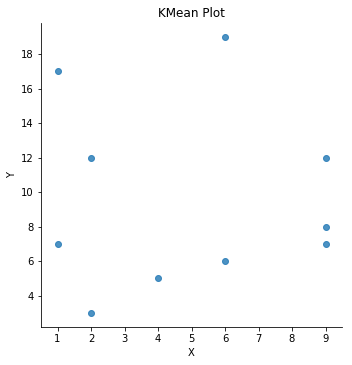

In [106]:
sns.lmplot('x','y',data=df,fit_reg = False , markers='o', size=5)
plt.title('KMean Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

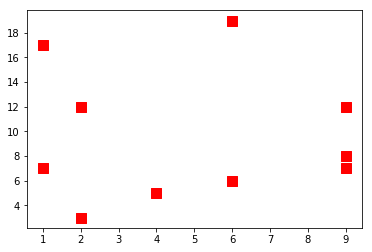

In [107]:
plt.scatter(df.x,df.y,100,'r','s')

In [108]:
df.keys()

Index(['x', 'y'], dtype='object')

In [109]:
data_points = df.values # 벨류값을 찍으려고 담음 

In [110]:
km = KMeans(n_clusters=3)  # KMeans 가져와서 3개로 분류할 예정 
km.fit(data_points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [111]:
km.labels_ #군집에 이름을 붙여줌 

array([1, 0, 0, 2, 1, 0, 0, 1, 2, 2])

In [112]:
km.cluster_centers_

array([[ 3.25,  5.25],
       [ 3.  , 16.  ],
       [ 9.  ,  9.  ]])

In [113]:
df['cluster_id'] = km.labels_ 

In [114]:
df

,x,y,cluster_id
0,1,17,1
1,6,6,0
2,2,3,0
3,9,12,2
4,2,12,1
5,4,5,0
6,1,7,0
7,6,19,1
8,9,8,2
9,9,7,2


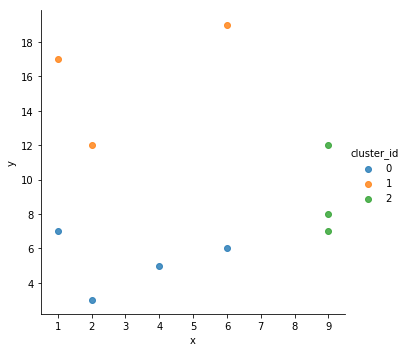

In [115]:
sns.lmplot('x','y', data = df , fit_reg = False , markers='o',height=5,
          hue='cluster_id')

In [116]:
# 중심지정도 표시 
# 다른색으로 출력 
# cluster_id : 0 ,1 ,2, 3 

In [117]:
df2 = pd.DataFrame(km.cluster_centers_)
df2

,0,1
0,3.25,5.25
1,3.00,16.00
2,9.00,9.00


In [118]:
df2.columns=['x','y']
df2

,x,y
0,3.25,5.25
1,3.00,16.00
2,9.00,9.00


In [119]:
center_df = pd.DataFrame({'x' :km.cluster_centers_[:,0],'y' :km.cluster_centers_[:,1],'cluster_id':3})
df = pd.concat([center_df,df])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


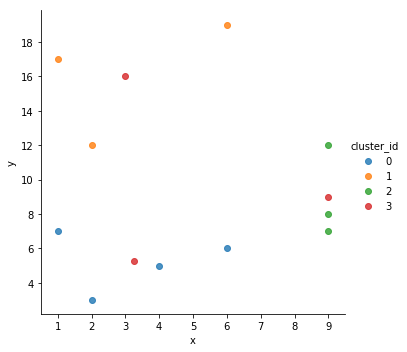

In [120]:
sns.lmplot('x','y', data = df , fit_reg = False , markers='o',height=5,
          hue='cluster_id')

In [121]:
# # hw1. 
# 1 부터 100 사이의 정수 x 
# 1 부터 100 사이의 정수 y

# 둘을 컬럼으로 하는 df2 

# 중심점 5개로 하는 kmean방법으로 데이터를 분리하여
# 화면에 출력

In [122]:
x =np.random.randint(1,1000,200)
y =np.random.randint(1,1000,200)

# x,y

In [123]:
df2 = pd.DataFrame({"x":x,'y':y})
# df2

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


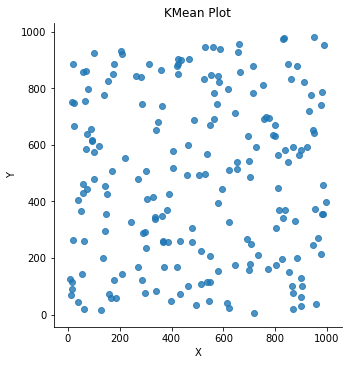

In [124]:
sns.lmplot('x','y',data=df2,fit_reg = False , markers='o', size=5)
plt.title('KMean Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [125]:
data_points = df2.values

In [126]:
km = KMeans(n_clusters=5)
km.fit(data_points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [127]:
km.labels_

array([4, 2, 0, 1, 2, 0, 2, 2, 3, 2, 3, 2, 1, 2, 0, 3, 1, 2, 4, 3, 3, 3,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 0, 4, 1, 3, 2, 3, 1, 1, 3,
       1, 1, 3, 1, 2, 4, 1, 2, 0, 2, 1, 0, 3, 4, 1, 0, 3, 3, 3, 3, 0, 1,
       0, 2, 4, 4, 3, 4, 1, 0, 1, 4, 4, 0, 3, 1, 4, 2, 4, 1, 4, 3, 2, 1,
       3, 1, 2, 1, 4, 3, 0, 0, 2, 4, 1, 4, 4, 3, 3, 1, 1, 1, 3, 0, 2, 1,
       1, 2, 2, 1, 3, 4, 4, 3, 1, 1, 3, 0, 1, 4, 4, 4, 1, 2, 1, 1, 1, 1,
       4, 2, 1, 0, 0, 3, 2, 2, 4, 0, 4, 2, 4, 3, 0, 2, 3, 2, 4, 0, 4, 0,
       4, 4, 3, 0, 0, 2, 1, 2, 1, 1, 0, 4, 4, 4, 1, 3, 4, 1, 2, 4, 1, 2,
       1, 2, 0, 4, 2, 2, 2, 3, 4, 2, 0, 1, 3, 2, 3, 1, 0, 4, 3, 2, 4, 3,
       1, 0])

In [128]:
km.cluster_centers_

array([[116.93333333, 220.96666667],
       [744.41818182, 736.89090909],
       [213.825     , 763.275     ],
       [838.80555556, 210.69444444],
       [430.92307692, 279.        ]])

In [129]:
df2['cluster_id'] = km.labels_ 

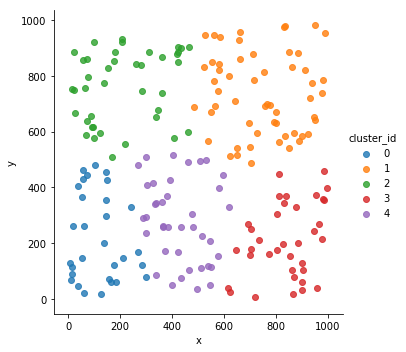

In [130]:
sns.lmplot('x','y', data = df2 , fit_reg = False , markers='o',height=5,
          hue='cluster_id')

In [131]:
center_df2 = pd.DataFrame({'x' :km.cluster_centers_[:,0],'y' :km.cluster_centers_[:,1],'cluster_id':5})
df2 = pd.concat([center_df2,df2])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


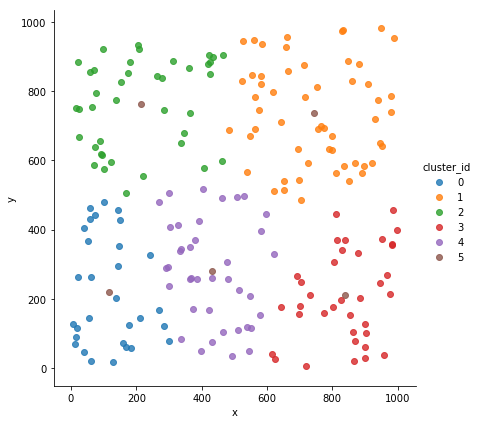

In [132]:
sns.lmplot('x','y', data = df2 , fit_reg = False , markers='o',height=6,
          hue='cluster_id')